In [32]:
CODE_ROOT = pwd() * "/../.."

"/home/rrs/Desktop/MPAS/MPAS_Ocean_Julia/output/operator_convergence/../.."

In [31]:
using DelimitedFiles
include(CODE_ROOT * "/visualization.jl")

vertexHeatMapMesh (generic function with 1 method)

In [114]:
function convergence_plot(operator_name, ncells, ErrorNorm, errortype; decimals=2)
    ncells = sqrt.(ncells)
    
    A = [log10.(ncells)    ones(length(ncells))]
    m, c = A \ log10.(ErrorNorm)
    y = m*log10.(ncells) .+ c
    y = 10 .^ y

    fig, ax = subplots(1,1, figsize=(9,9))
    loglog(ncells, ErrorNorm, label="$errortype Error Norm", marker="s", linestyle="None", color="black")

    slopestr ="$(round(m,digits=decimals))"
    while length(split(slopestr, ".")[end]) < decimals
        slopestr *= "0"
    end
    loglog(ncells, y, label="Best Fit Line, slope=$(slopestr)", color="black")
    ax.set_title("Convergence of $operator_name", fontsize=21, fontweight="bold")
    ax.legend(loc="upper right")
    ax.set_xlabel("Number of cells")
    ax.set_ylabel("$errortype Error Norm of $operator_name")
    grid(which="both")
    
    return fig, ax
end

convergence_plot (generic function with 2 methods)

In [106]:
function readconvergencefile(operator_name, periodicity)
    fname = CODE_ROOT * "/output/operator_convergence/$operator_name/$periodicity/"
    fname = filter(x->x[end-3:end] == ".txt", readdir(fname, join=true))[end]
    return readdlm(fname), fname
end

readconvergencefile (generic function with 1 method)

In [100]:
operatortitles = Dict{String,String}(
    "Numerical Curl (at Cell Center)" => "Numerical Curl Operator Interpolated to Cell Centers",
    "Numerical Curl (at Vertex)" => "Numerical Curl Operator Calculated at Vertices",
    "Numerical Divergence" => "Numerical Divergence Operator at Cell Centers",
    "Numerical Gradient" => "Numerical Gradient Operator Normal to Edge",
    "Tangential Velocity" => "Numerical Tangential Velocity along Edges"
)

Dict{String, String} with 5 entries:
  "Numerical Gradient"              => "Numerical Gradient Operator Normal to E…
  "Numerical Curl (at Cell Center)" => "Numerical Curl Operator Interpolated to…
  "Numerical Divergence"            => "Numerical Divergence Operator at Cell C…
  "Numerical Curl (at Vertex)"      => "Numerical Curl Operator Calculated at V…
  "Tangential Velocity"             => "Numerical Tangential Velocity along Edg…

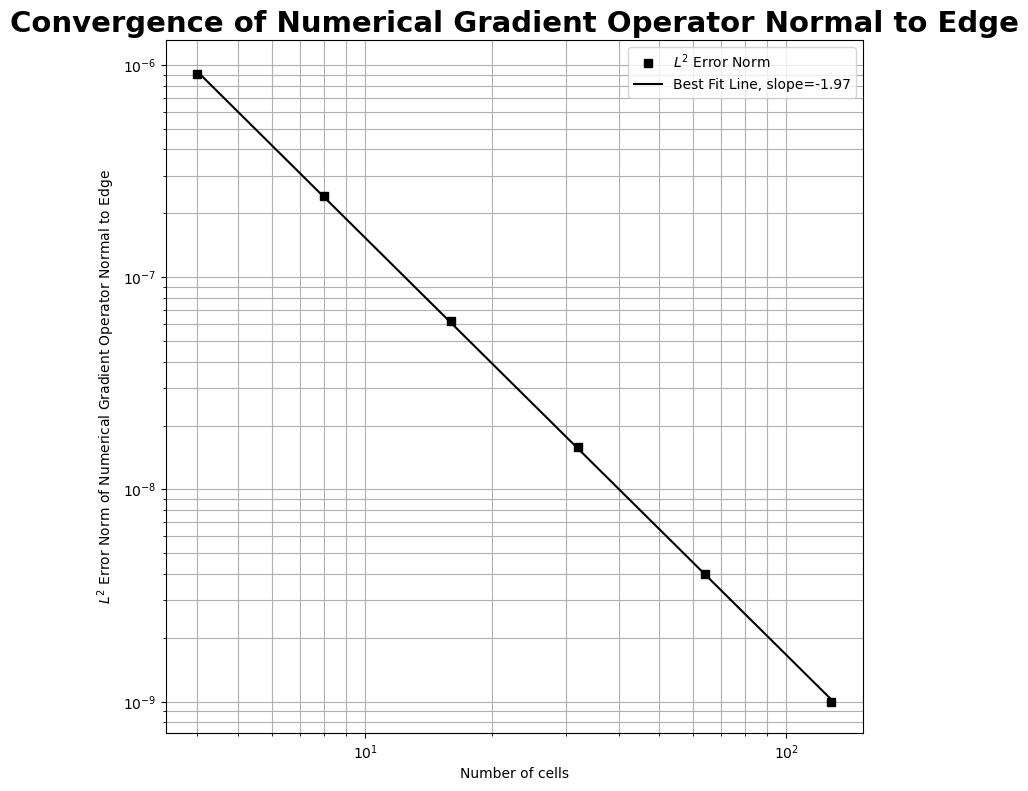

saved file at /home/rrs/Desktop/MPAS/MPAS_Ocean_Julia/output/operator_convergence/../../output/operator_convergence/Numerical Gradient/NonPeriodic_xy/2022-08-28T21:28:51.731.txt_convergenceplot.png


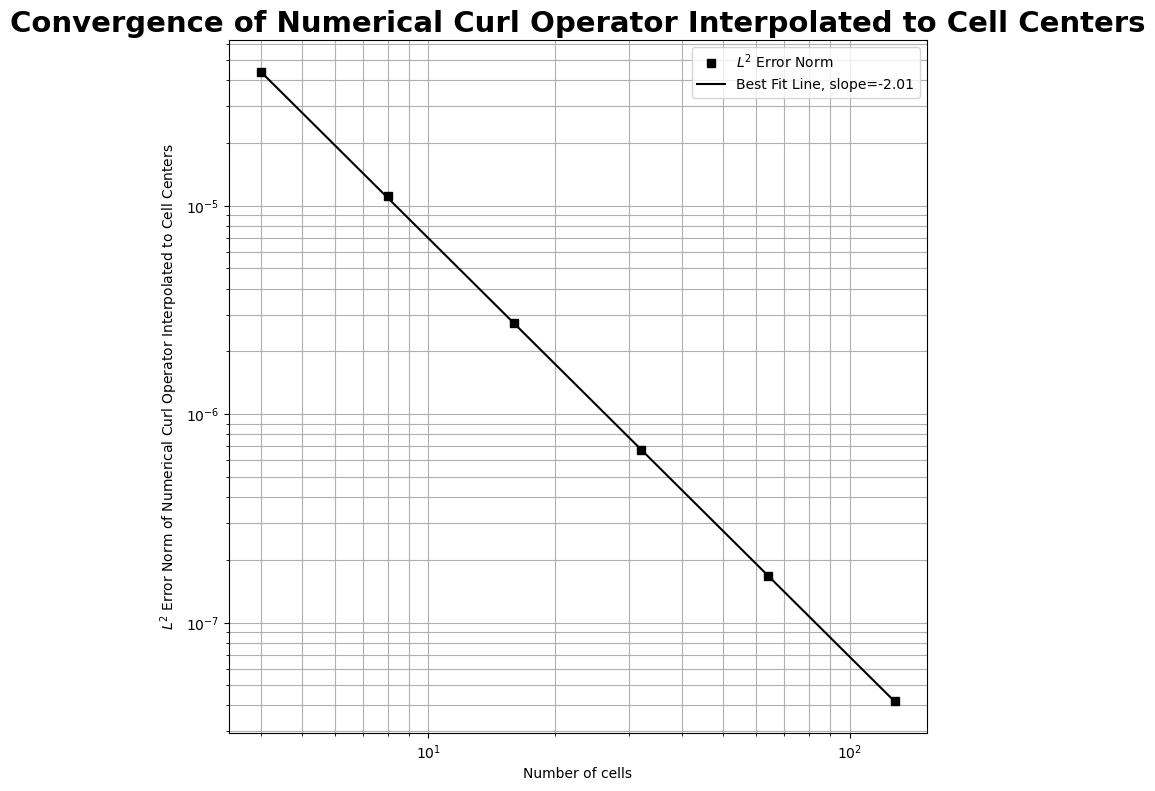

saved file at /home/rrs/Desktop/MPAS/MPAS_Ocean_Julia/output/operator_convergence/../../output/operator_convergence/Numerical Curl (at Cell Center)/NonPeriodic_xy/2022-08-28T21:27:01.017.txt_convergenceplot.png


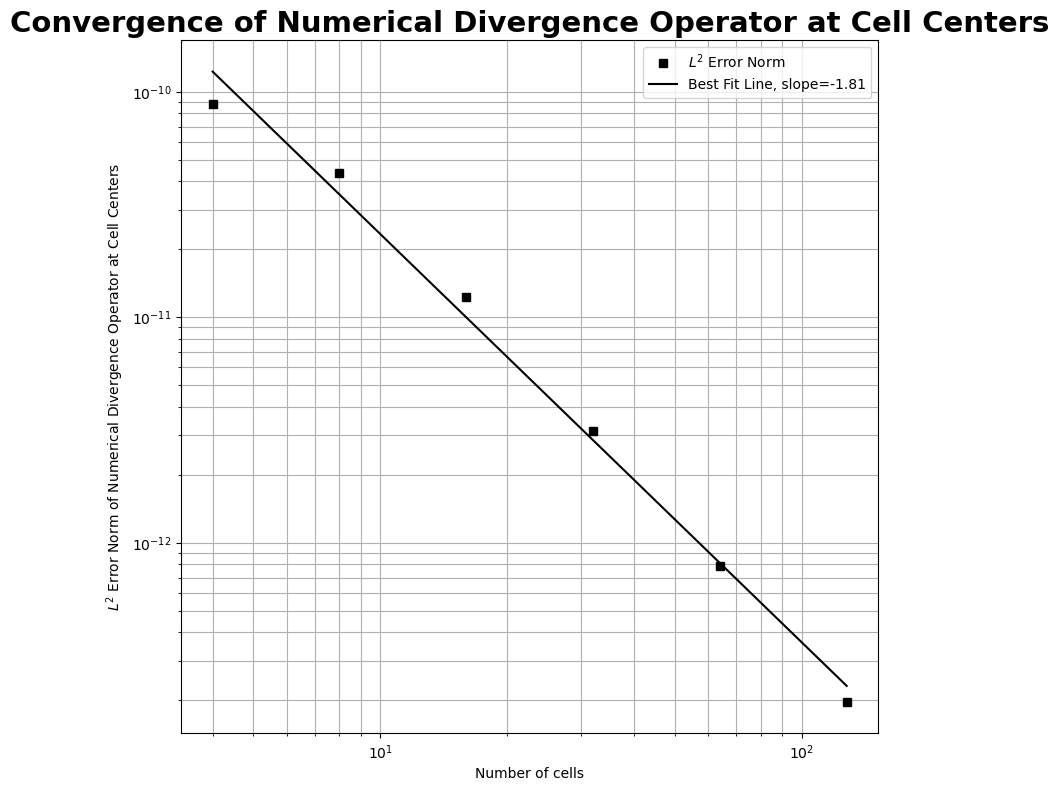

saved file at /home/rrs/Desktop/MPAS/MPAS_Ocean_Julia/output/operator_convergence/../../output/operator_convergence/Numerical Divergence/NonPeriodic_xy/2022-08-28T21:30:01.018.txt_convergenceplot.png


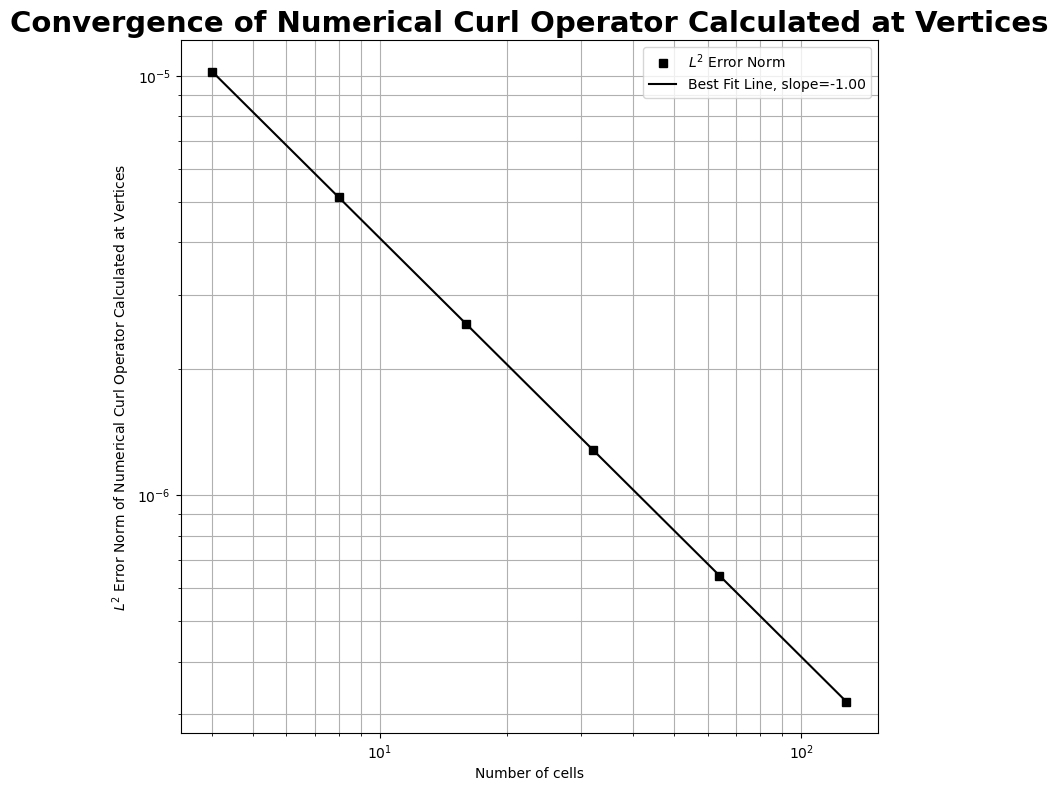

saved file at /home/rrs/Desktop/MPAS/MPAS_Ocean_Julia/output/operator_convergence/../../output/operator_convergence/Numerical Curl (at Vertex)/NonPeriodic_xy/2022-08-28T21:26:13.739.txt_convergenceplot.png


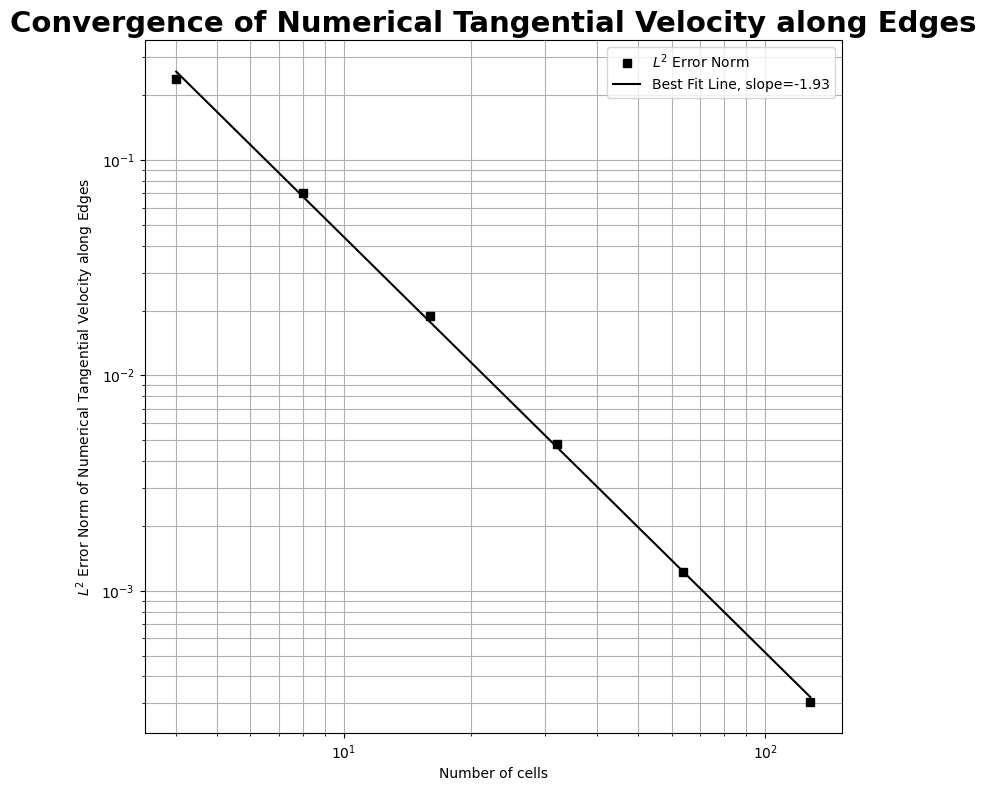

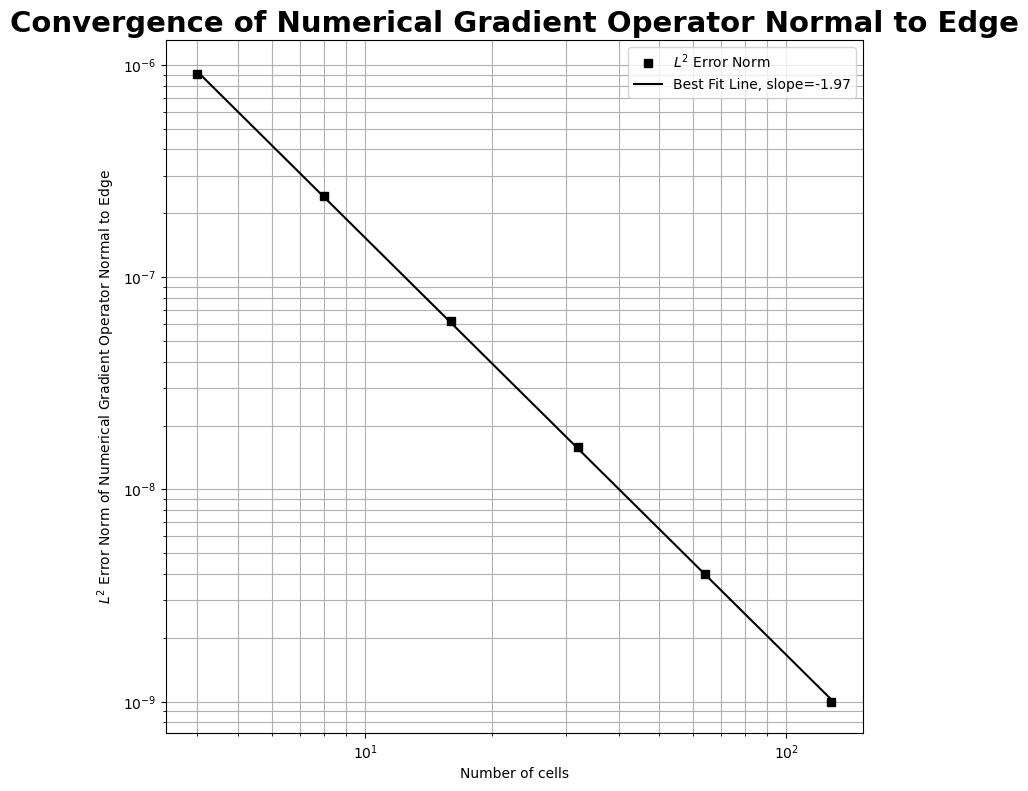

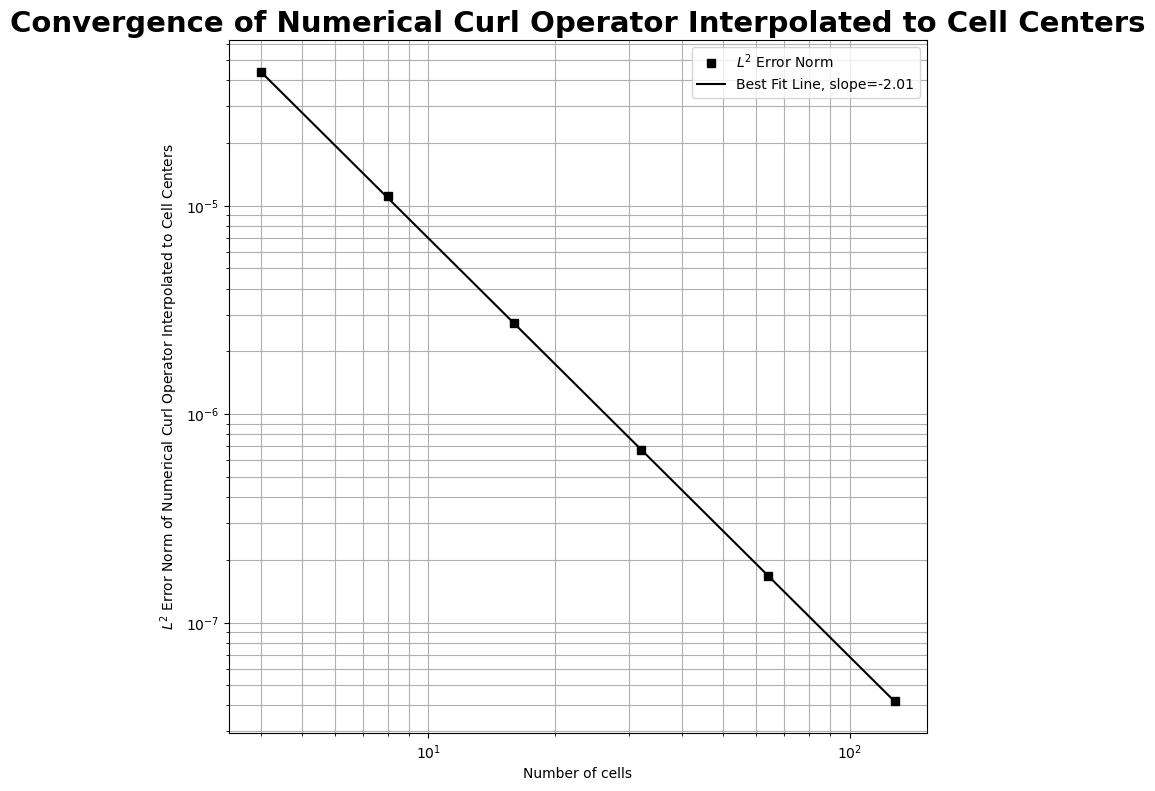

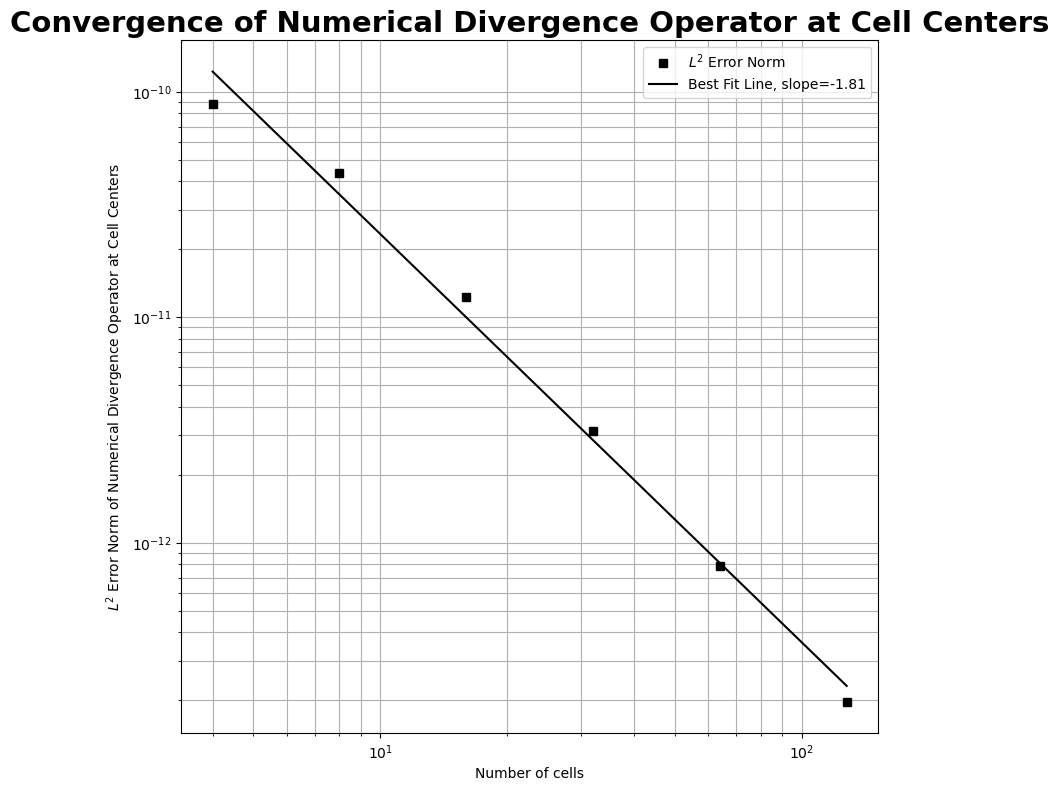

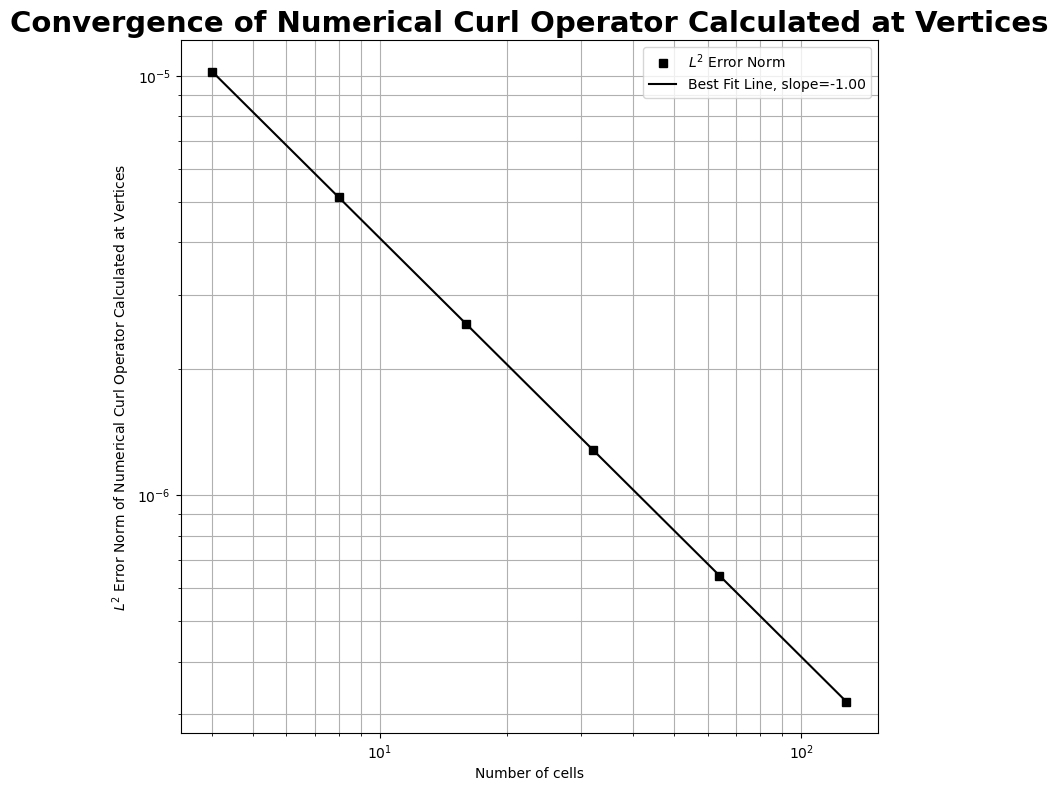

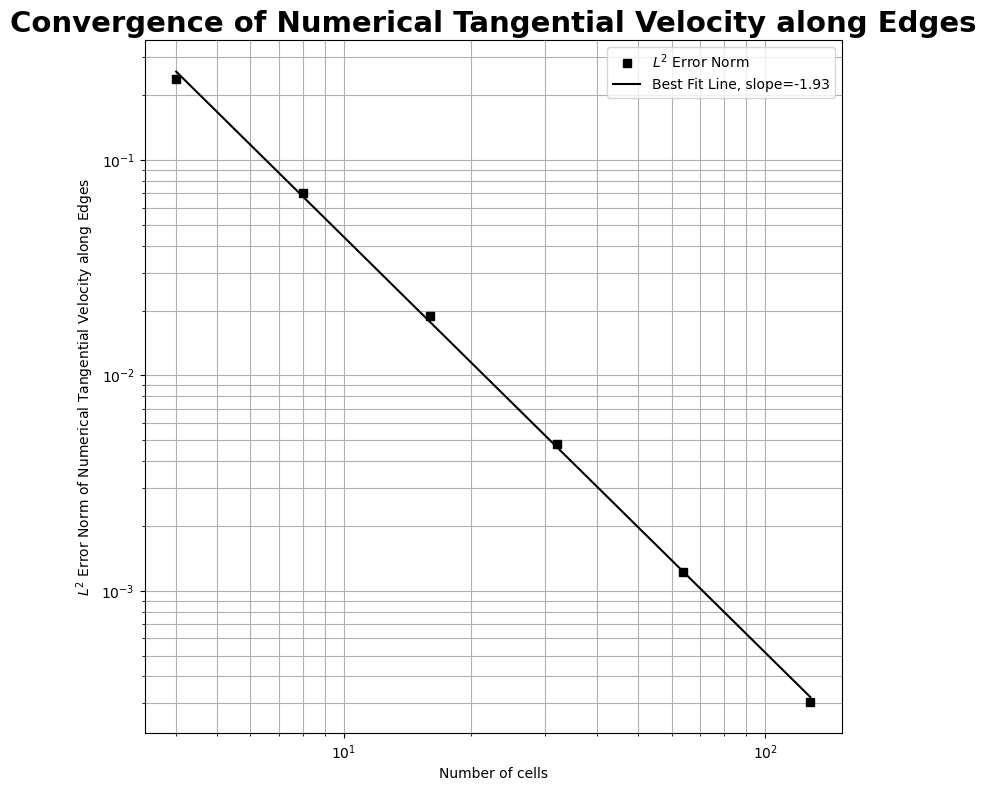

saved file at /home/rrs/Desktop/MPAS/MPAS_Ocean_Julia/output/operator_convergence/../../output/operator_convergence/Tangential Velocity/NonPeriodic_xy/2022-08-28T21:14:56.672.txt_convergenceplot.png


In [118]:
for operator_name in keys(operatortitles)
    data, fname = readconvergencefile(operator_name, "NonPeriodic_xy")
    ncells = data[1,:]
    L2ErrorNorm = data[4,:]
    fig, ax = convergence_plot(operatortitles[operator_name], ncells, L2ErrorNorm, "\$L^2\$")
    fig.savefig("$(fname)_convergenceplot.png")
    println("saved file at $(fname)_convergenceplot.png")
    display(fig)
end